# Findings and Observations for Zomato Restaurant
1)Needed to create a model which would predict the Average cost for two and Price range.
2)The csv file gave the error as 'UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte' when tried to get in DataFrame which was fixed by the command encoding='ISO-8859-1'
3)Second part of the file was in excel which was extracted and both the files were merged
4)There were no null found.
5)There were numerical columns and categorical columns which were required to be split due to the analysis and then the RestaurantID column was set as the index
5) Then we ran the Describe function which helped us to identify columns which has skewness to the right and to the left
6)By using the distplot and boxplot we identified that there was lot of skewness in columns Price range and votes
7)Skewness was reduced by using the Cuberoot method
8)Then we converted the text columns into numbers by using the OrdinalEncoder logic
9)Correlation with target Average cost for two was positive for a few columns but not too biased so did not delete any columns
10)Multicollinearity was high between Locality and Country Code columns and was deleted to fix the same
11)There was Imbalance of the data in label and used the SMOTE function to overcome the Oversampling fitting
12)The best model selected from the analysis was Random Forest regressor model and DecisionTree Classifier model.
13)For the prediction of Price the same steps were followed till Step 5.
14)By using the distplot and boxplot we identified that there was lot of skewness in columns Country Code, Average cost for two and votes
15)Skewness was reduced by using the Cuberoot method
16)Then we converted the text columns into numbers by using the OrdinalEncoder logic
17)Price range had a positive correlation with few columns. 
18)Multicollinearity was high between Locality and Country Code columns and was deleted to fix the same
19)The best model selected after the analysis was RandomForest Classifier model and ExtraTrees Classifier and the outcome after HyperParameter Tuning was 100%

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding = 'ISO-8859-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df2=pd.read_excel(r'C:\Users\HP\Downloads\Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df = pd.merge(df1, df2, on='Country Code')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [7]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [9]:
#checking the columns of dataset
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [10]:
#checking thev types of column
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [11]:
#checking the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
df.isnull().sum().sum()

9

In [13]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64


Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula         

In [14]:
#Fill the null values
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [15]:
#checking the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Numerical Columns:  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [17]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [18]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [19]:
#Stastical summary of numerical column
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [20]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


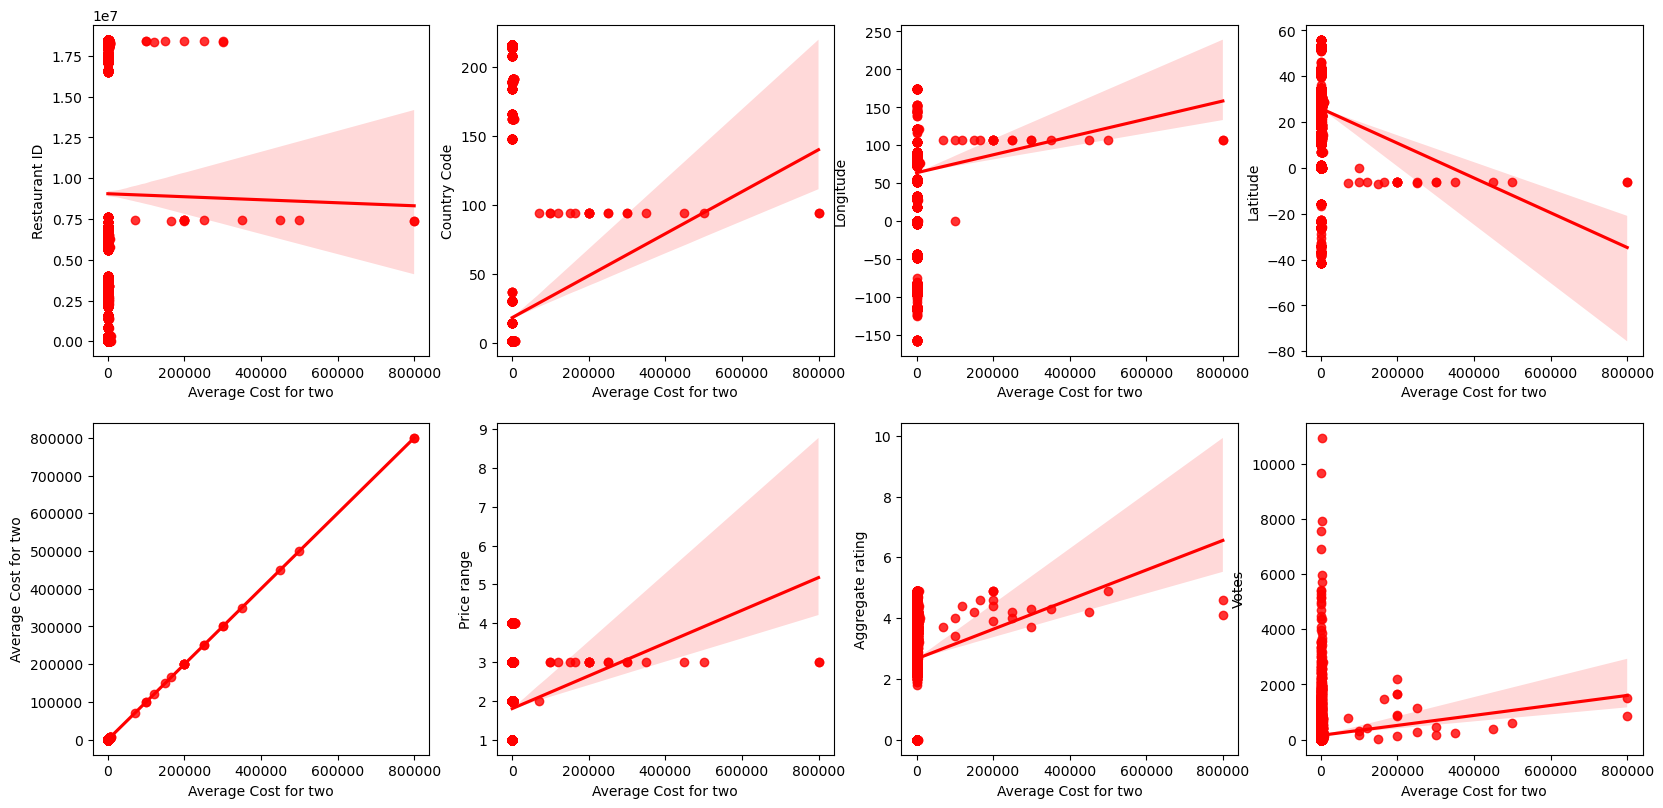

In [21]:
plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Average Cost for two', y=i, data=df, color='r')
        plt.xlabel('Average Cost for two')
        plt.ylabel(i)
    p+=1
    
plt.show()

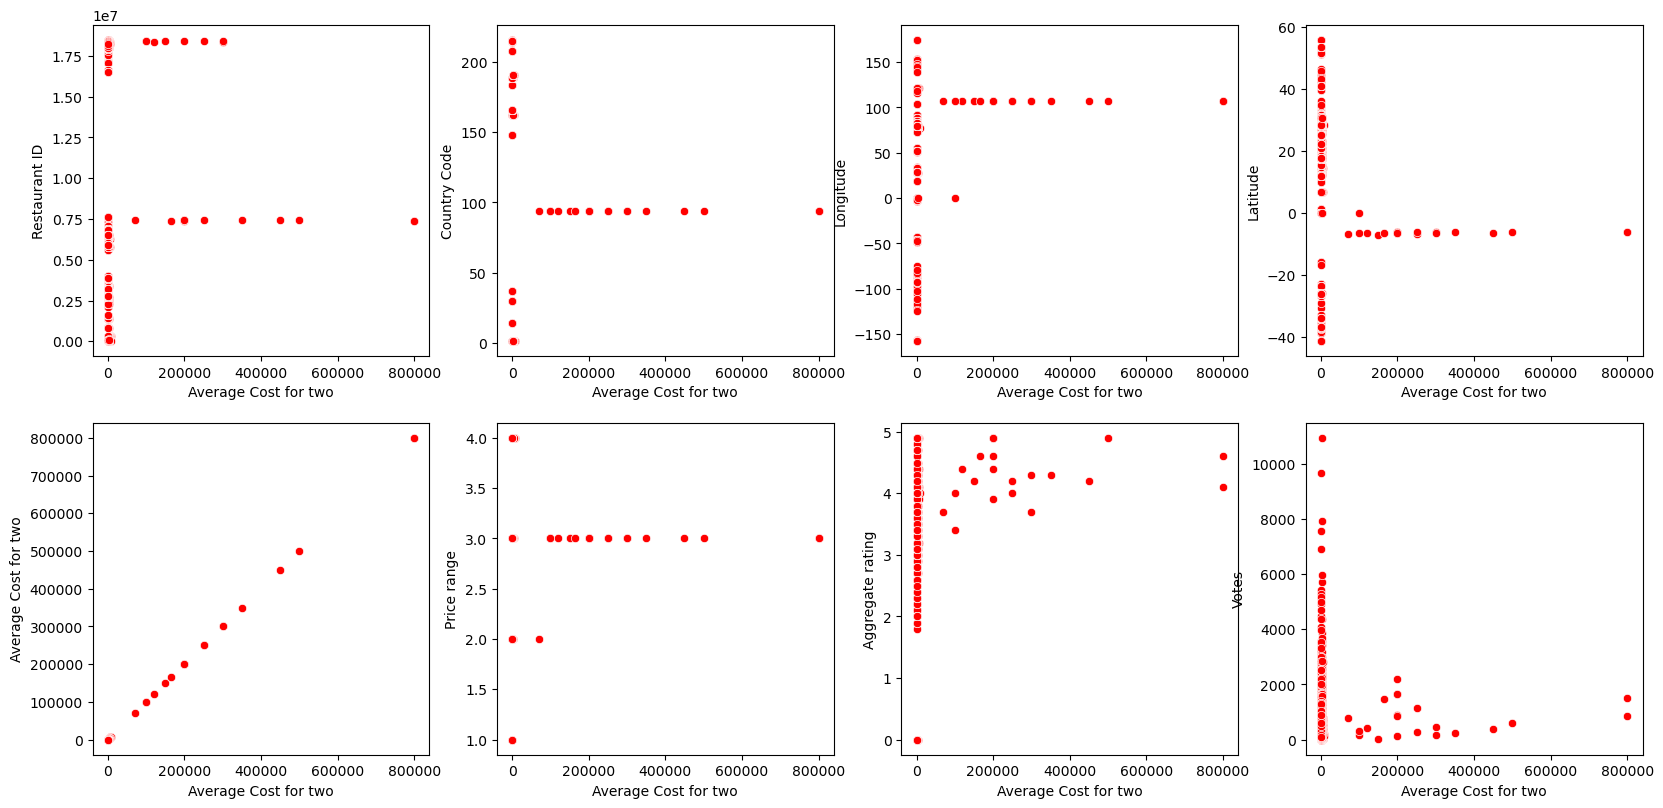

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Average Cost for two', y=i, data=df, color='r')
        plt.xlabel('Average Cost for two')
        plt.ylabel(i)
    p+=1
plt.show()

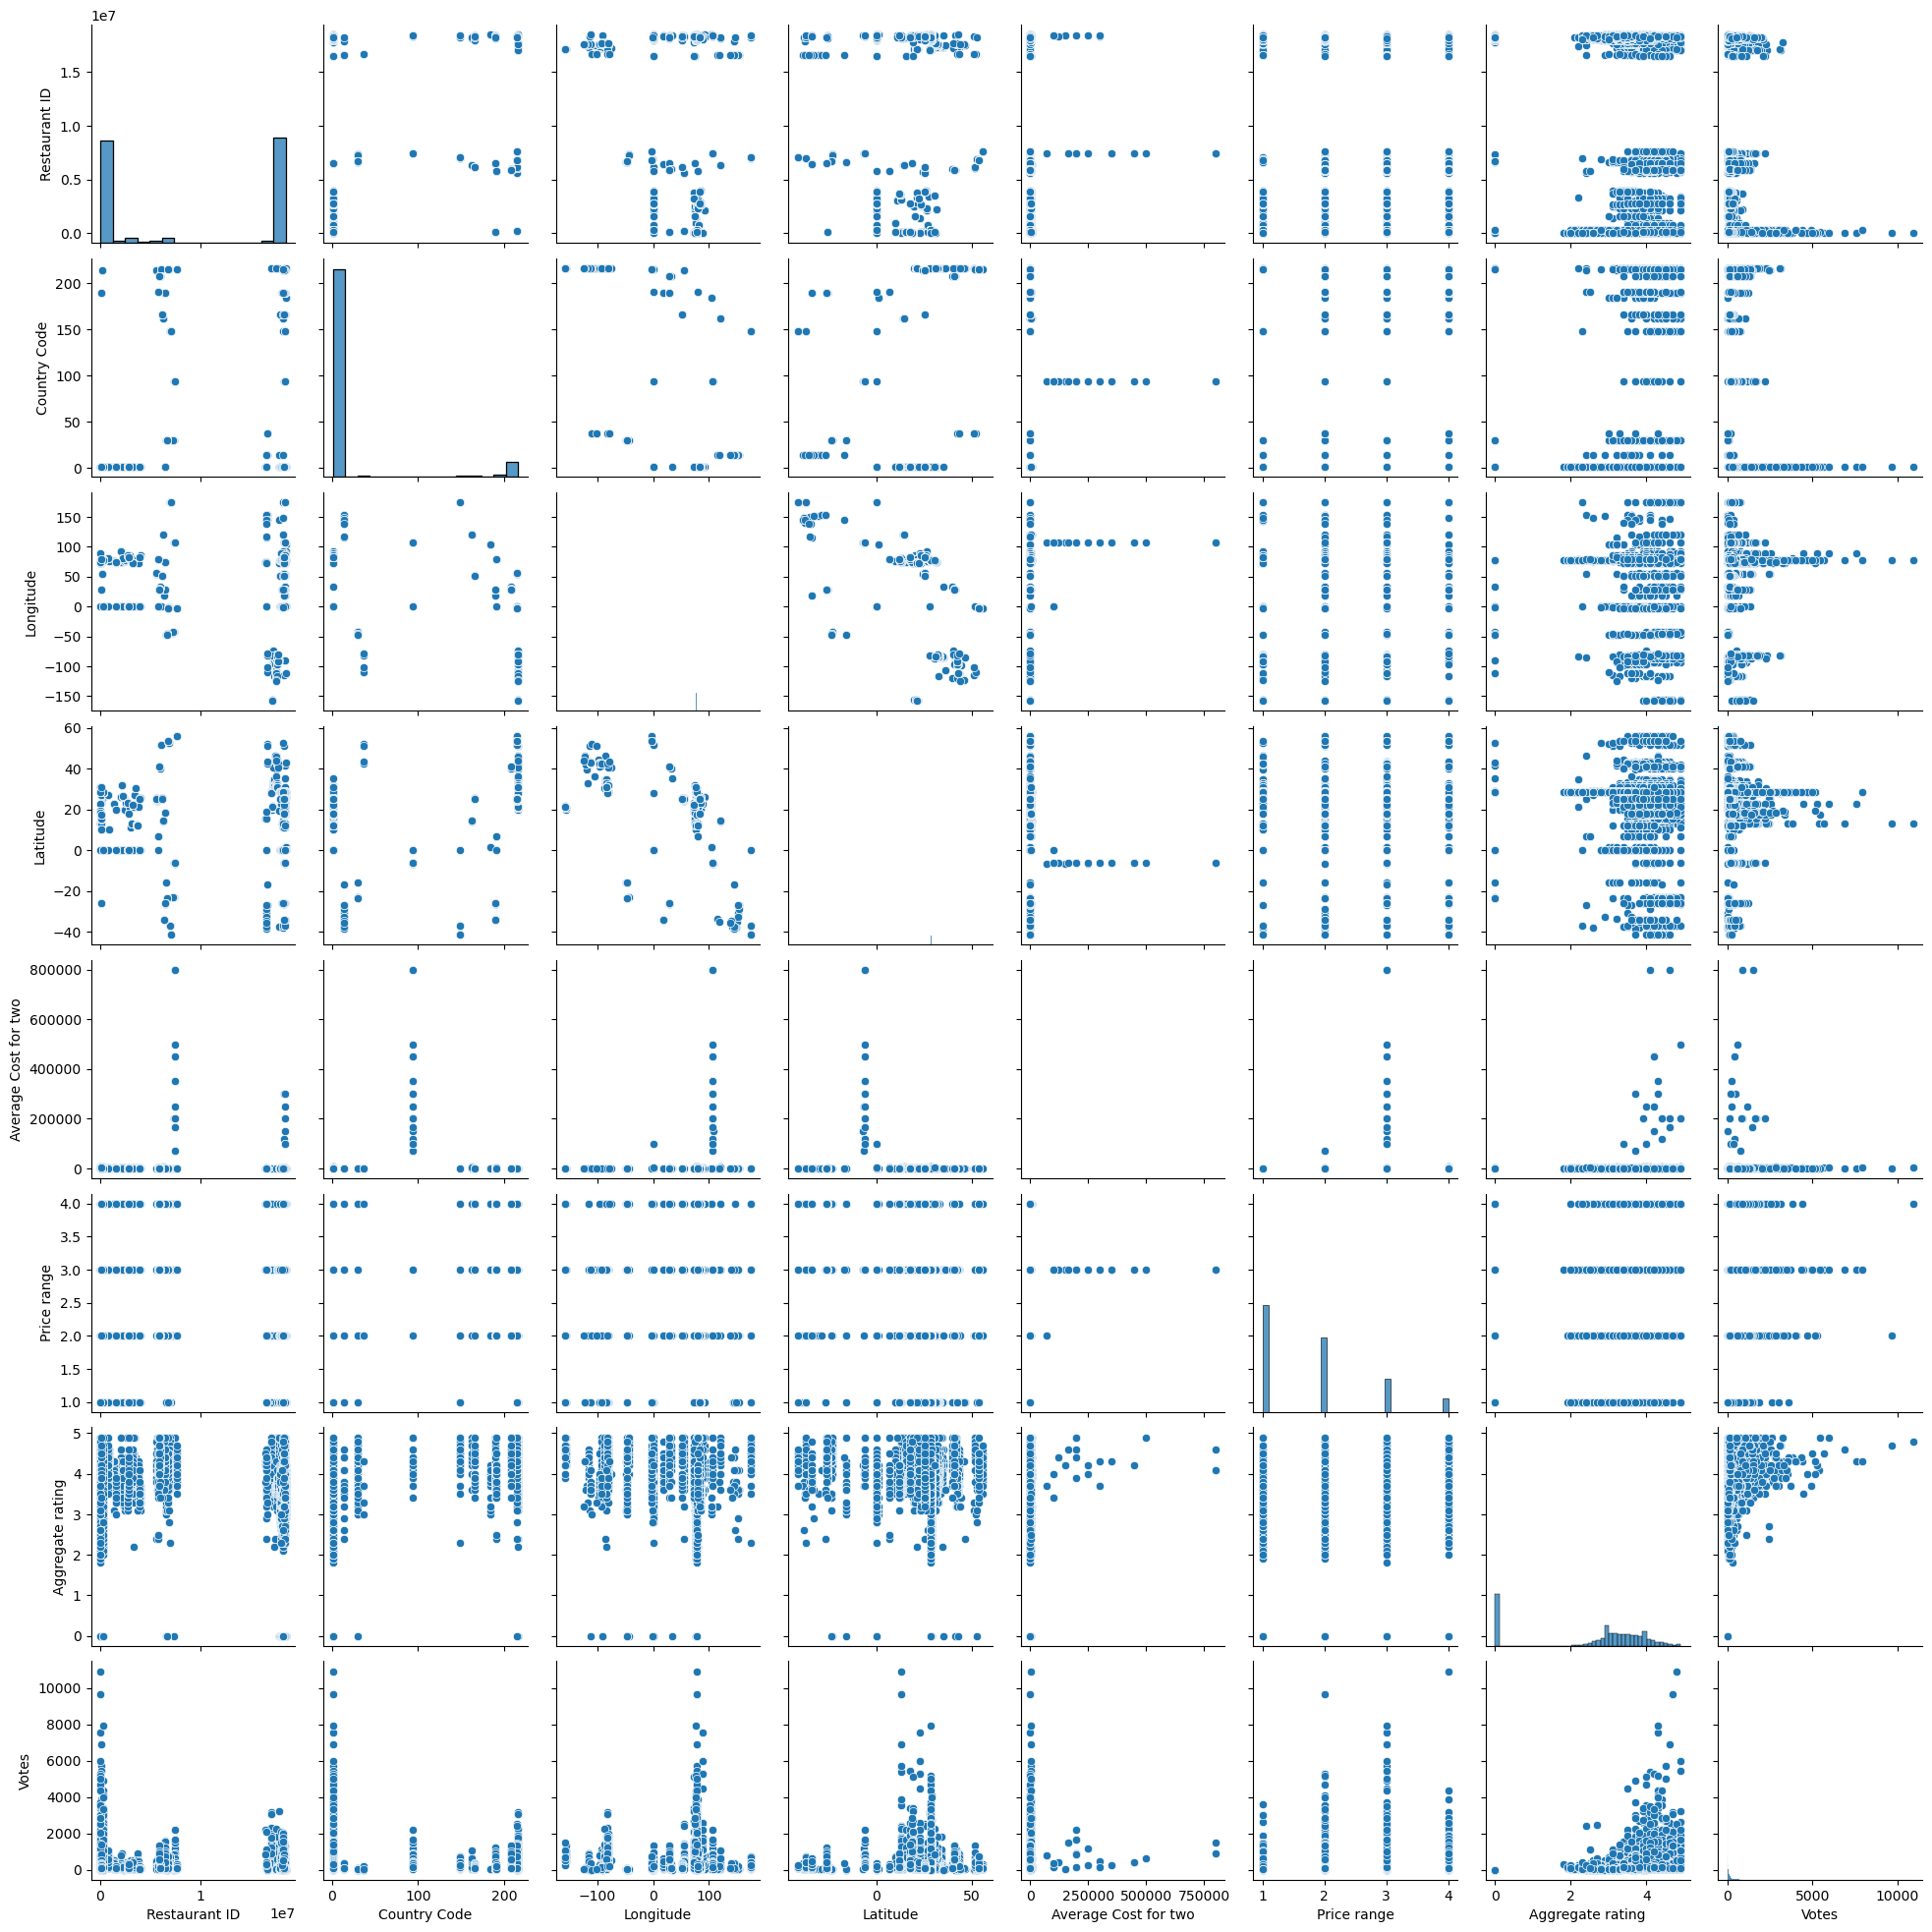

In [23]:
sns.pairplot(data=df, palette='Dark2')

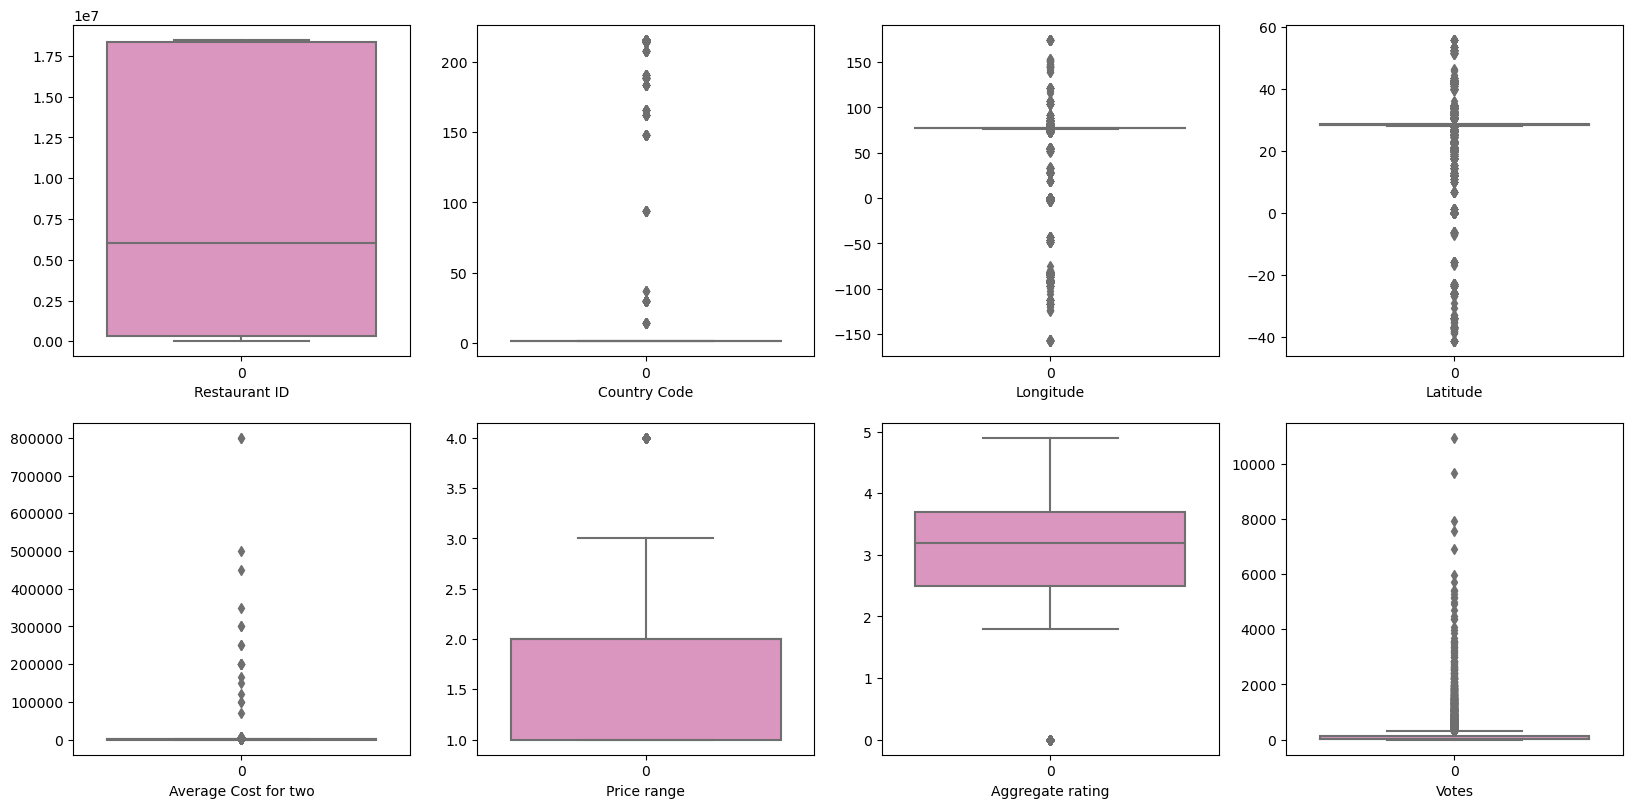

In [24]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [25]:
#Setting Date as DataFrame index
df.set_index('Restaurant ID', inplace=True)

In [26]:
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,80,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",170,...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey


In [28]:
df[['Country Code', 'Longitude', 'Latitude', 'Price range', 
    'Aggregate rating','Votes']].skew()

Country Code        3.043965
Longitude          -2.807328
Latitude           -3.081635
Price range         0.889618
Aggregate rating   -0.954130
Votes               8.807637
dtype: float64

In [29]:
#Removing Skewness using Cuberoot method
df['Price range'] = np.cbrt(df['Price range'])

df['Votes'] = np.cbrt(df['Votes'])

In [30]:
df[['Country Code', 'Longitude', 'Latitude', 'Price range', 
    'Aggregate rating','Votes']].skew()

Country Code        3.043965
Longitude          -2.807328
Latitude           -3.081635
Price range         0.495755
Aggregate rating   -0.954130
Votes               1.204920
dtype: float64

In [31]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,,,,,,,,,,,,,,,,,,,,,
6317637,3749.0,162,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,1100,...,1.0,0.0,0.0,0.0,1.442250,4.8,0.0,1.0,6.796884,6.0
6304287,3173.0,162,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,1200,...,1.0,0.0,0.0,0.0,1.442250,4.5,0.0,1.0,8.391942,6.0
6300002,2897.0,162,75.0,4684.0,308.0,314.0,121.056831,14.581404,1671.0,4000,...,1.0,0.0,0.0,0.0,1.587401,4.4,1.0,5.0,6.463304,6.0
6318506,4707.0,162,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,1500,...,0.0,0.0,0.0,0.0,1.587401,4.9,0.0,1.0,7.146569,6.0
6314302,5523.0,162,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,1500,...,1.0,0.0,0.0,0.0,1.587401,4.8,0.0,1.0,6.118033,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915730,4443.0,208,140.0,5926.0,517.0,523.0,28.977392,41.022793,1813.0,80,...,0.0,0.0,0.0,0.0,1.442250,4.1,1.0,5.0,9.236528,11.0
5908749,1311.0,208,140.0,5962.0,552.0,558.0,29.041297,41.009847,1824.0,105,...,0.0,0.0,0.0,0.0,1.442250,4.2,1.0,5.0,10.112073,11.0
5915807,3069.0,208,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,170,...,0.0,0.0,0.0,0.0,1.587401,3.7,5.0,2.0,8.710983,11.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9551 entries, 6317637 to 5927402
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   float64
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   float64
 3   Address               9551 non-null   float64
 4   Locality              9551 non-null   float64
 5   Locality Verbose      9551 non-null   float64
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   float64
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   float64
 11  Has Table booking     9551 non-null   float64
 12  Has Online delivery   9551 non-null   float64
 13  Is delivering now     9551 non-null   float64
 14  Switch to order menu  9551 non-null   float64
 15  Price range      

In [33]:
#Checking the correlation between features and the target
cor = df.corr()
cor

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.020012,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,0.019241,...,0.041173,0.028082,0.011984,NaN,0.061901,0.029367,-0.007311,0.012131,0.035905,0.017560
Country Code,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,-0.132902,0.043225,...,-0.061682,-0.154605,-0.018291,NaN,0.234402,0.282189,-0.187174,0.222685,0.308535,0.968700
City,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,-0.028838,...,-0.003762,0.012723,-0.014039,NaN,-0.112830,-0.132163,0.110887,-0.098985,-0.125856,-0.180959
Address,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,0.022749,...,0.006428,0.029874,0.031267,NaN,-0.045684,-0.151153,0.071264,-0.008029,-0.178531,-0.235815
Locality,0.004322,-0.120075,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,-0.012136,...,-0.065594,-0.030993,-0.007299,NaN,-0.117427,-0.174336,0.036831,-0.036969,-0.202118,-0.118784
Locality Verbose,0.004281,-0.117543,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,-0.011852,...,-0.065132,-0.031766,-0.007353,NaN,-0.115352,-0.173254,0.037104,-0.035430,-0.200445,-0.116406
Longitude,-0.001920,-0.698299,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,0.045891,...,0.100488,0.178757,0.018787,NaN,-0.078515,-0.116818,0.059979,-0.181466,-0.147268,-0.766221
Latitude,0.009922,0.019792,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,-0.111088,...,0.054658,0.118722,0.015001,NaN,-0.149886,0.000516,0.042590,-0.129447,0.005973,0.181299
Cuisines,0.051679,-0.132902,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,0.005831,...,0.050639,-0.016639,0.007773,NaN,-0.002900,-0.080331,-0.016228,-0.079979,-0.062206,-0.127955
Average Cost for two,0.019241,0.043225,-0.028838,0.022749,-0.012136,-0.011852,0.045891,-0.111088,0.005831,1.000000,...,0.007758,-0.018974,-0.001862,NaN,0.074285,0.051792,-0.049970,0.031439,0.083667,-0.004034


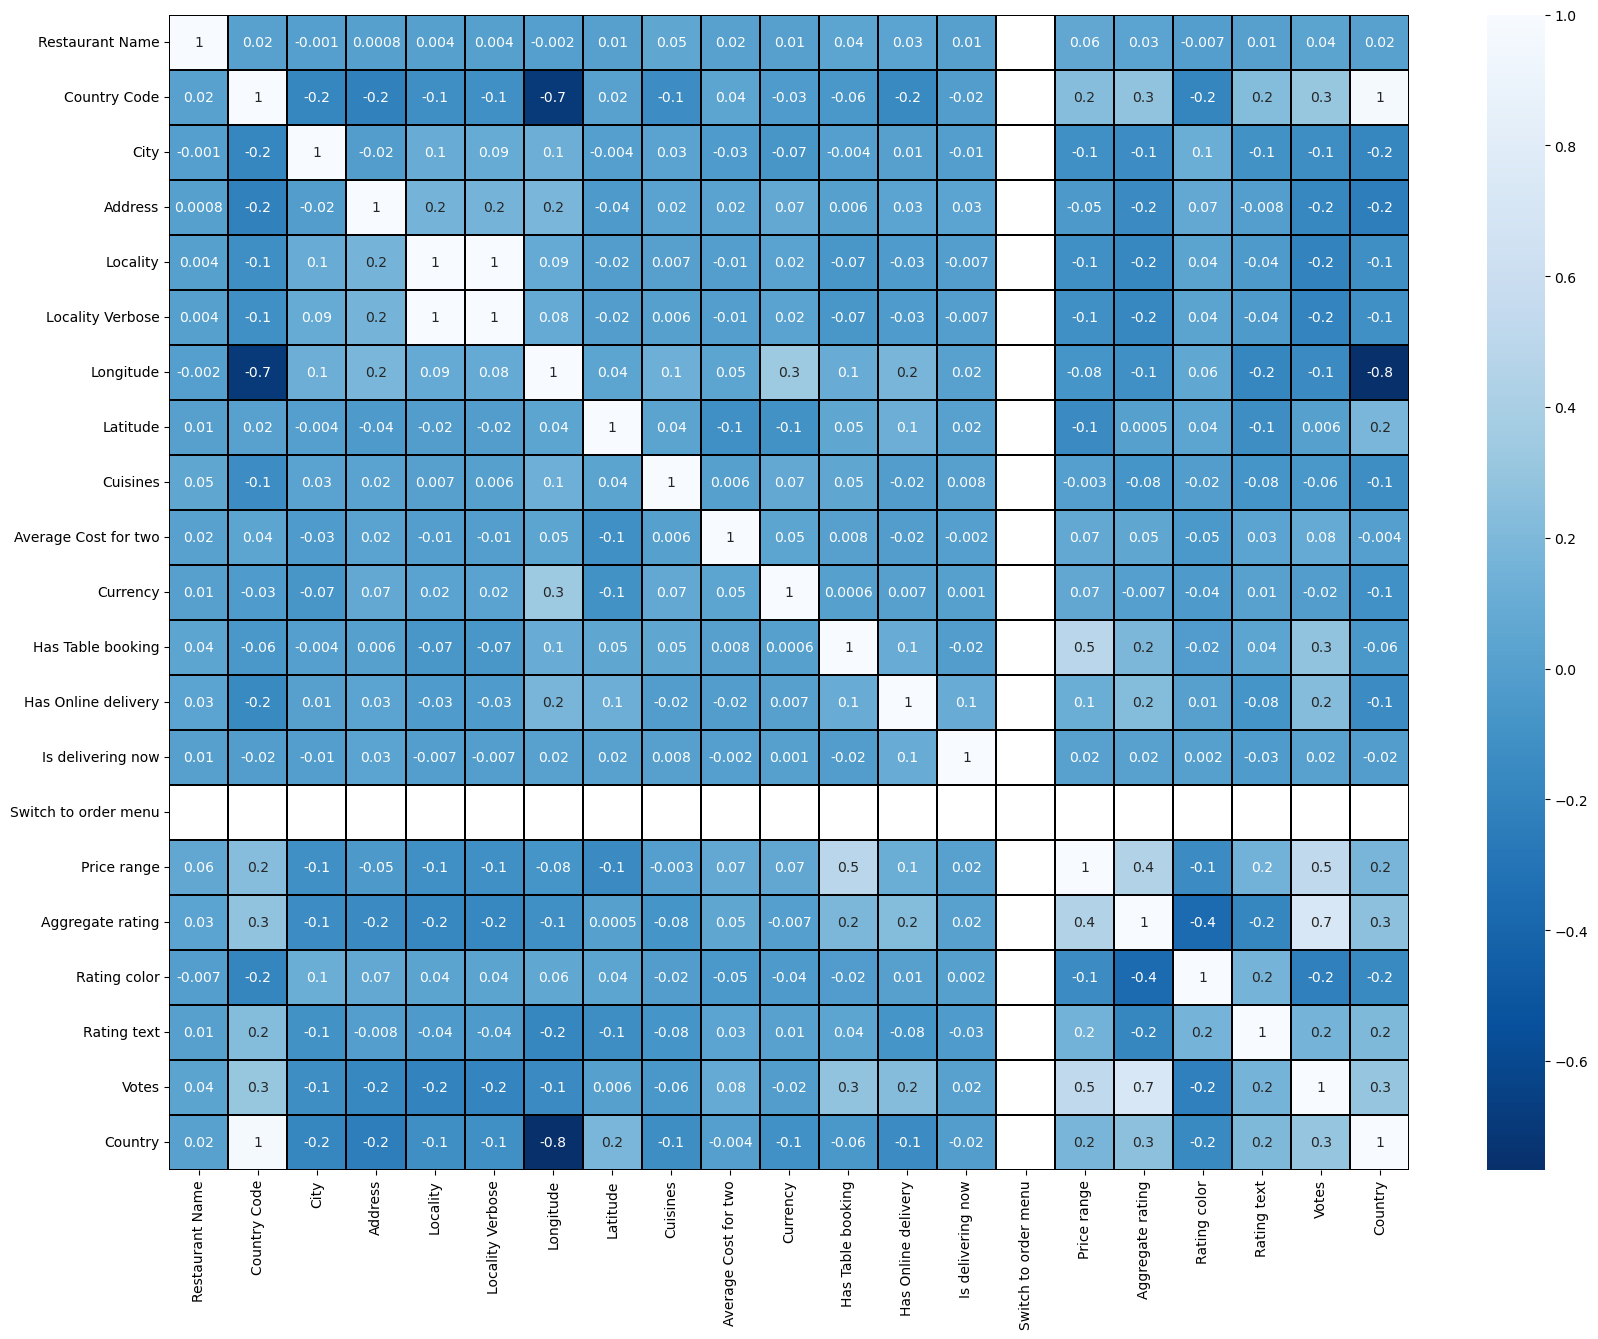

In [34]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [36]:
cor['Average Cost for two'].sort_values(ascending = False)

Average Cost for two    1.000000
Votes                   0.083667
Price range             0.074285
Aggregate rating        0.051792
Longitude               0.045891
Currency                0.045615
Country Code            0.043225
Rating text             0.031439
Address                 0.022749
Restaurant Name         0.019241
Has Table booking       0.007758
Cuisines                0.005831
Is delivering now      -0.001862
Country                -0.004034
Locality Verbose       -0.011852
Locality               -0.012136
Has Online delivery    -0.018974
City                   -0.028838
Rating color           -0.049970
Latitude               -0.111088
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

In [37]:
#Seperate features and label
x = df.drop("Average Cost for two", axis=1)
y = df["Average Cost for two"]

In [38]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.044706,2.531111,-0.228533,1.614667,-1.542278,-1.523333,1.372269,-1.025581,-0.135100,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.324498,1.407131,-1.977859,-0.465442,1.143711,0.853457
1,-0.224101,2.531111,-0.228533,0.589558,-0.206201,-0.230035,1.371945,-1.026647,0.236387,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.324498,1.209281,-1.977859,-0.465442,1.719680,0.853457
2,-0.352904,2.531111,-0.142317,0.055177,-1.108528,-1.095249,1.372975,-1.024131,1.325565,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.074617,1.143331,-1.308053,1.895070,1.023257,0.853457
3,0.491783,2.531111,-0.142317,1.616615,0.645470,0.595987,1.372966,-1.023775,0.265562,-4.351046,-0.371446,-0.587547,-0.059771,0.0,2.074617,1.473081,-1.977859,-0.465442,1.269981,0.853457
4,0.872592,2.531111,-0.142317,1.616226,0.645470,0.595987,1.372991,-1.023854,0.257782,-4.351046,2.692181,-0.587547,-0.059771,0.0,2.074617,1.407131,-1.977859,-0.465442,0.898581,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.368580,3.341718,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.601750,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.324498,0.945480,-1.308053,1.895070,2.024656,2.738952
9547,-1.093055,3.341718,2.659685,0.553309,-0.336009,-0.359666,-0.846144,1.376849,1.623144,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.324498,1.011430,-1.308053,1.895070,2.340811,2.738952
9548,-0.272635,3.341718,2.659685,0.554868,-0.329677,-0.350622,-0.846305,1.381025,0.234442,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.074617,0.681680,1.371170,0.124686,1.834884,2.738952
9549,-1.465464,3.341718,2.659685,0.555258,-0.329677,-0.350622,-0.846272,1.381221,1.298336,7.681415,-0.371446,-0.587547,-0.059771,0.0,2.074617,0.879530,-1.308053,1.895070,2.177017,2.738952


In [39]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [40]:
vif

,VIF values,Features
0,1.008131,Restaurant Name
1,47.798631,Country Code
2,1.087548,City
3,1.111878,Address
4,955.988620,Locality
5,954.949540,Locality Verbose
6,5.131505,Longitude
7,3.048697,Latitude
8,1.045609,Cuisines
9,1.299270,Currency


In [41]:
#Dropping Locality column
x.drop("Locality", axis=1, inplace=True)

In [42]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [43]:
vif

,VIF values,Features
0,1.008115,Restaurant Name
1,47.777626,Country Code
2,1.079097,City
3,1.110255,Address
4,1.071980,Locality Verbose
5,5.130682,Longitude
6,3.048544,Latitude
7,1.045282,Cuisines
8,1.298407,Currency
9,1.422776,Has Table booking


In [52]:
#Dropping Locality column
x.drop("Country Code", axis=1, inplace=True)

In [53]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [54]:
vif

,VIF values,Features
0,1.008036,Restaurant Name
1,1.076442,City
2,1.107489,Address
3,1.070369,Locality Verbose
4,3.436274,Longitude
5,1.366141,Latitude
6,1.044905,Cuisines
7,1.298325,Currency
8,1.418732,Has Table booking
9,1.181851,Has Online delivery


In [55]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [56]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.059150525993045266 at random_state 188


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [60]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.059150525993045266
R2_score on training Data: 2.3381555858964953
Mean Absolute Error: 2180.0903189678543
Mean Squared Error: 176588341.88408232
Root mean squared error: 13288.654630325913


In [61]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  -1.2197447468018812
R2_score on training Data: 97.28578249271935
Mean Absolute Error: 1354.5795359385902
Mean Squared Error: 416624609.0081237
Root mean squared error: 20411.384299163143


In [62]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.3092635023878355
R2_score on training Data: 69.33483138348619
Mean Absolute Error: 761.1911374738312
Mean Squared Error: 129644556.50133984
Root mean squared error: 11386.15635328006


In [63]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  -1.7153936123522944
R2_score on training Data: 99.97281257681163
Mean Absolute Error: 1409.9794515179442
Mean Squared Error: 509653104.79025227
Root mean squared error: 22575.4978857666


In [64]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.059124551303319284
R2_score on training Data: 2.3381379679261127
Mean Absolute Error: 2177.4417925198854
Mean Squared Error: 176593217.0819927
Root mean squared error: 13288.838063652995


In [65]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.059142561358014545
R2_score on training Data: 2.338155041059442
Mean Absolute Error: 2179.7480836775444
Mean Squared Error: 176589836.76900563
Root mean squared error: 13288.710876868592


In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  -3.626678393863183
R2_score on training Data: 100.0
Mean Absolute Error: 1791.5453593859038
Mean Squared Error: 868382763.2103977
Root mean squared error: 29468.334924294548


In [68]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  -0.0032472487593493415
R2_score on training Data: -0.07298079486020015
Mean Absolute Error: 1067.2004417158987
Mean Squared Error: 188299800.39598915
Root mean squared error: 13722.2374413209


In [69]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  -0.3150529978019394
R2_score on training Data: 99.99999998281702
Mean Absolute Error: 1085.8554396371246
Mean Squared Error: 246822722.2177515
Root mean squared error: 15710.592675572476


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[-5.18298154e+02 -2.45663153e+01 -4.60126234e+00 -2.03569990e+00
 -5.08188557e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C738FF0>
Difference between R2 score and cross validation score is - 10996.045321851758


In [72]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[-7.89085298e+03  8.32360151e-01  8.24205243e-01  8.48024843e-01
 -3.83046965e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C7391D0>
Difference between R2 score and cross validation score is - 157645.0698366319


In [73]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[-1.52155741e+02 -9.14532518e+00  6.75561143e-01  6.48331840e-01
 -5.37911255e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C739D10>
Difference between R2 score and cross validation score is - 3230.577397068801


In [74]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[-9.70809569e+03  4.76666417e-01  7.87488300e-01  7.56355215e-01
 -4.14526119e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C738990>
Difference between R2 score and cross validation score is - 193950.04719574322


In [75]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[-5.11089564e+02 -2.45110266e+01 -4.58181651e+00 -2.02274797e+00
 -4.98333650e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C739F50>
Difference between R2 score and cross validation score is - 10850.115222563896


In [76]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[-5.13220907e+02 -2.45562228e+01 -4.59910251e+00 -2.03438278e+00
 -5.08062607e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C739590>
Difference between R2 score and cross validation score is - 10894.22816086857


In [77]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[ 0.17050578  0.18032502  0.30452481  0.18253559 -0.00699208]
<built-in method mean of numpy.ndarray object at 0x0000018C5C739530>
Difference between R2 score and cross validation score is - -16.942707206625798


In [78]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[-1.00139306e+03 -1.45703836e+01  8.25286628e-01  7.90341404e-01
 -4.78699774e-03]
<built-in method mean of numpy.ndarray object at 0x0000018C5C738DB0>
Difference between R2 score and cross validation score is - 20255.546815650356


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [81]:
# Create a based model
RFR = RandomForestRegressor()

In [82]:
# Instantiate the grid search model
GCV = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [83]:
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [84]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [85]:
Model = RandomForestRegressor(bootstrap = True, max_depth=100, max_features=3, min_samples_leaf=3, 
                              min_samples_split=8, n_estimators=300)

In [86]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.6748935526760425
Mean Absolute Error: 841.5627260269848
Mean Squared Error: 61019334.18133369
Root mean squared error: 7811.487321972282


In [87]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "ZomatoRestaurant_Regression.pk1")

['ZomatoRestaurant_Regression.pk1']

In [88]:
#Lets load the saved model and get the predictions
model = joblib.load('ZomatoRestaurant_Regression.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([409.43849009, 286.55268626, 644.83550759, ..., 659.41189962,
       305.53436676, 282.11368197])

In [89]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,409.438490,400
1,286.552686,250
2,644.835508,500
3,566.247208,600
4,619.276996,700
...,...,...
2861,220.608439,200
2862,576.409903,400
2863,659.411900,700
2864,305.534367,250


# Classification analysis

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df1= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding = 'ISO-8859-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [8]:
df2=pd.read_excel(r'C:\Users\HP\Downloads\Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [9]:
df = pd.merge(df1, df2, on='Country Code')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [10]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
#checking the columns of dataset
df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [14]:
#checking thev types of column
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [15]:
#checking the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64


Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64


Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula         

In [17]:
#Fill the null values
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [18]:
#checking the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [19]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Numerical Columns:  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [20]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [22]:
#Dropping Restaurant ID column
df.drop('Restaurant ID', axis=1, inplace=True)

KeyError: "['Restaurant ID'] not found in axis"

In [23]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [24]:
#Statistical summary of new columns
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


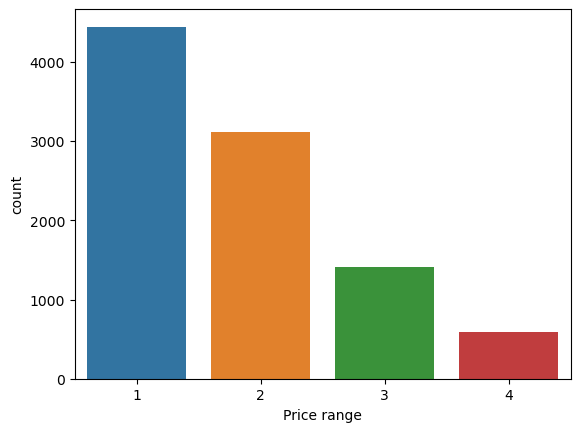

In [25]:
#Visualize the number of churned columns
ax = sns.countplot(x='Price range', data=df)
print(df['Price range'].value_counts())

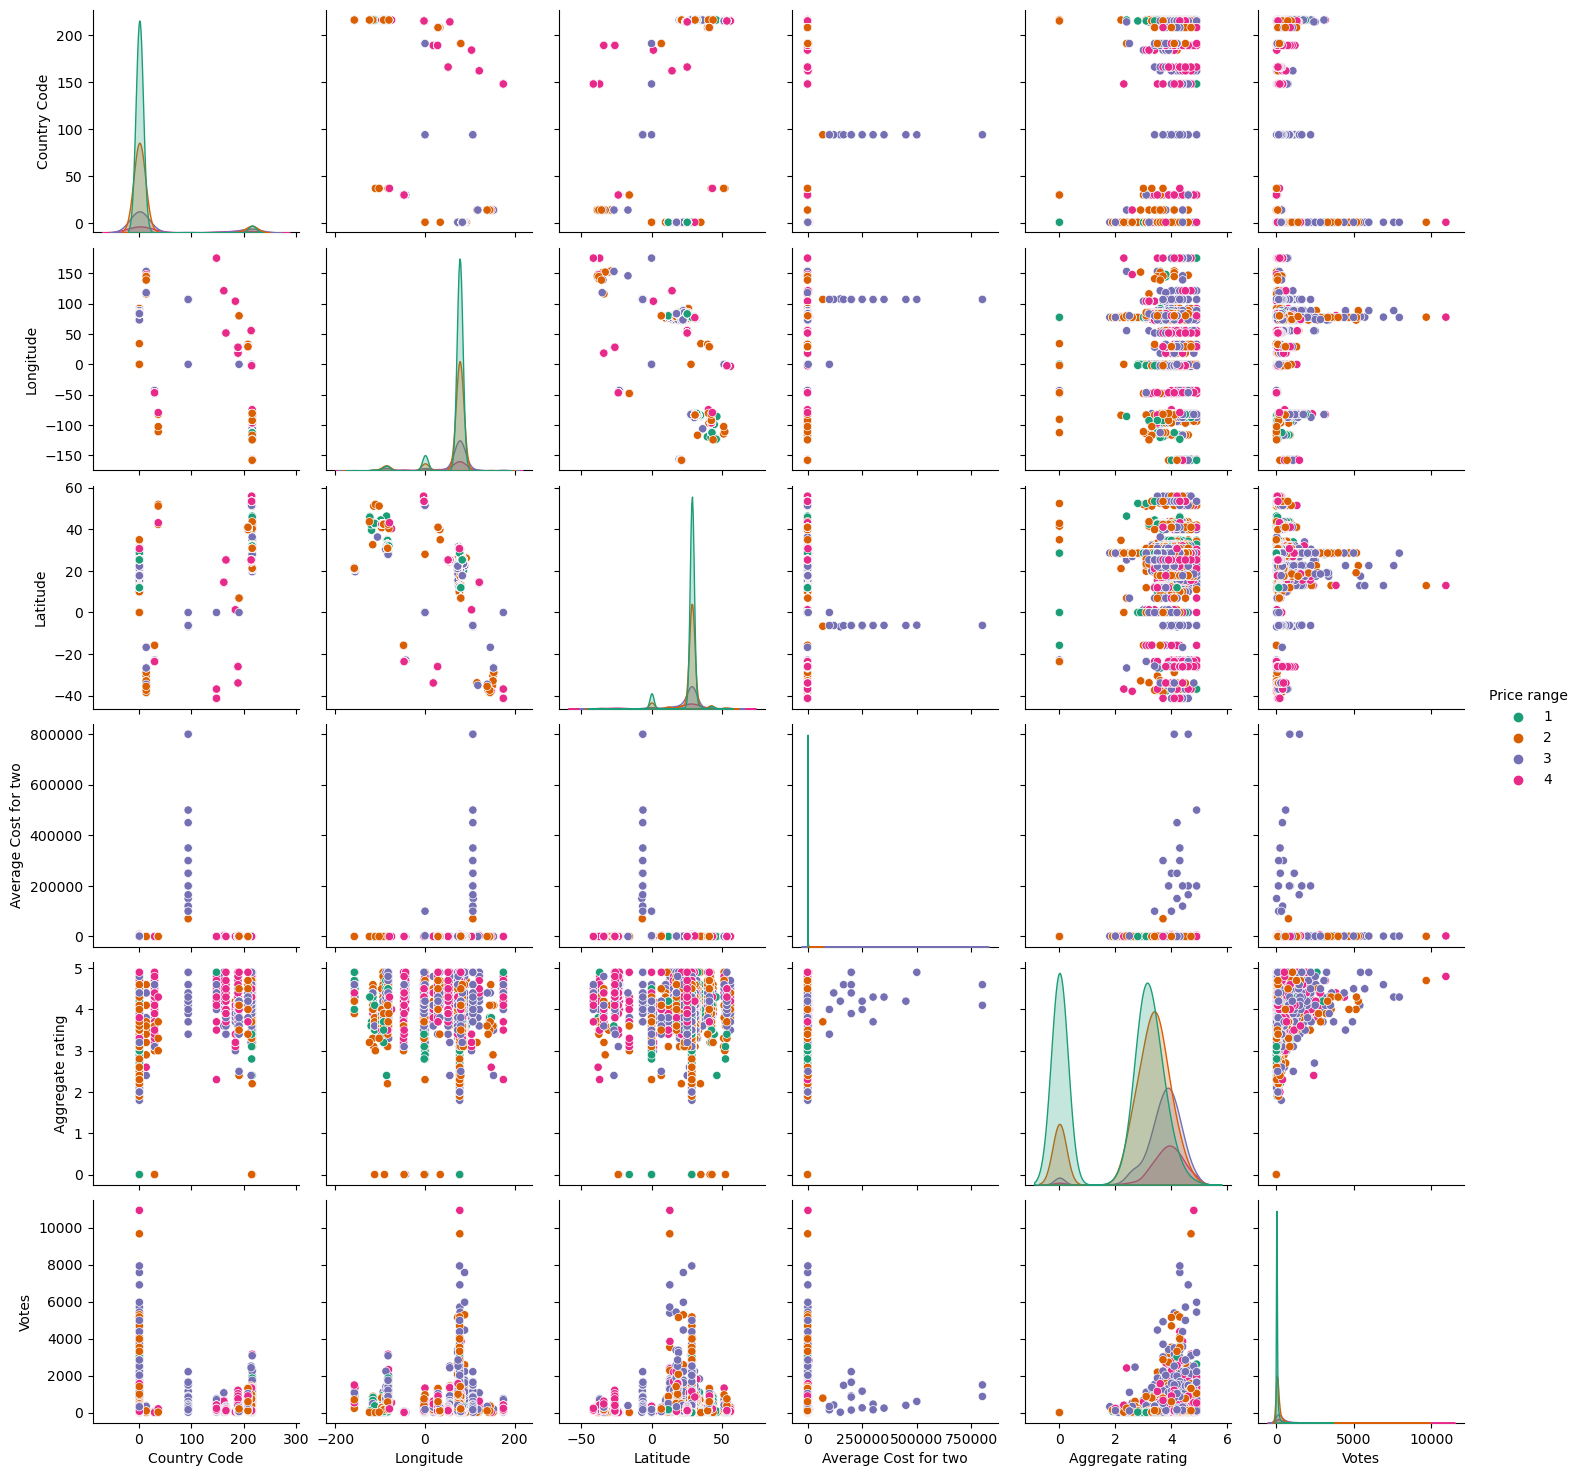

In [23]:
sns.pairplot(df, hue = 'Price range', palette = 'Dark2')
plt.show()

In [26]:
df[['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']].skew()

Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [27]:
#Removing Skewness using Cuberoot method
df['Country Code'] = np.cbrt(df['Country Code'])

df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])

df['Votes'] = np.cbrt(df['Votes'])

In [28]:
df[['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']].skew()

Country Code            2.923867
Longitude              -2.807328
Latitude               -3.081635
Average Cost for two    9.626632
Aggregate rating       -0.954130
Votes                   1.204920
dtype: float64

In [29]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749.0,5.451362,73.0,8685.0,171.0,172.0,121.027535,14.565443,920.0,10.322801,...,1.0,0.0,0.0,0.0,3,4.8,0.0,1.0,6.796884,6.0
1,3173.0,5.451362,73.0,6055.0,593.0,601.0,121.014101,14.553708,1111.0,10.626586,...,1.0,0.0,0.0,0.0,3,4.5,0.0,1.0,8.391942,6.0
2,2897.0,5.451362,75.0,4684.0,308.0,314.0,121.056831,14.581404,1671.0,15.874011,...,1.0,0.0,0.0,0.0,4,4.4,1.0,5.0,6.463304,6.0
3,4707.0,5.451362,75.0,8690.0,862.0,875.0,121.056475,14.585318,1126.0,11.447142,...,0.0,0.0,0.0,0.0,4,4.9,0.0,1.0,7.146569,6.0
4,5523.0,5.451362,75.0,8689.0,862.0,875.0,121.057508,14.584450,1122.0,11.447142,...,1.0,0.0,0.0,0.0,4,4.8,0.0,1.0,6.118033,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443.0,5.924992,140.0,5926.0,517.0,523.0,28.977392,41.022793,1813.0,4.308869,...,0.0,0.0,0.0,0.0,3,4.1,1.0,5.0,9.236528,11.0
9547,1311.0,5.924992,140.0,5962.0,552.0,558.0,29.041297,41.009847,1824.0,4.717694,...,0.0,0.0,0.0,0.0,3,4.2,1.0,5.0,10.112073,11.0
9548,3069.0,5.924992,140.0,5966.0,554.0,561.0,29.034640,41.055817,1110.0,5.539658,...,0.0,0.0,0.0,0.0,4,3.7,5.0,2.0,8.710983,11.0
9549,513.0,5.924992,140.0,5967.0,554.0,561.0,29.036019,41.057979,1657.0,4.932424,...,0.0,0.0,0.0,0.0,4,4.0,1.0,5.0,9.658468,11.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   float64
 1   Country Code          9551 non-null   float64
 2   City                  9551 non-null   float64
 3   Address               9551 non-null   float64
 4   Locality              9551 non-null   float64
 5   Locality Verbose      9551 non-null   float64
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   float64
 9   Average Cost for two  9551 non-null   float64
 10  Currency              9551 non-null   float64
 11  Has Table booking     9551 non-null   float64
 12  Has Online delivery   9551 non-null   float64
 13  Is delivering now     9551 non-null   float64
 14  Switch to order menu  9551 non-null   float64
 15  Price range          

In [31]:
#Stastical summary of numerical
df.describe()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,1.430570,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.461732,7.757365,...,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,2.952885,1.788713,3.629549,3.736781
std,2142.917876,1.365299,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.176108,3.566179,...,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.493048,1.694637,2.769494,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.000000,6.299605,...,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,1.709976,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.000000,7.368063,...,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,3.141381,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1353.500000,8.879040,...,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,5.078753,3.000000
max,7445.000000,6.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1824.000000,92.831777,...,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,22.195232,14.000000


In [32]:
#Checking the correlation between features and the target
cor = df.corr()
cor

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.020457,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,0.040538,...,0.041173,0.028082,0.011984,NaN,0.061275,0.029367,-0.007311,0.012131,0.035905,0.017560
Country Code,0.020457,1.000000,-0.178766,-0.212091,-0.120253,-0.117650,-0.681031,-0.052376,-0.135722,-0.229100,...,-0.064084,-0.160812,-0.018851,NaN,0.264689,0.289767,-0.196134,0.227076,0.306580,0.937321
City,-0.001399,-0.178766,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,-0.012940,...,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.125856,-0.180959
Address,0.000763,-0.212091,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,0.102814,...,0.006428,0.029874,0.031267,NaN,-0.034952,-0.151153,0.071264,-0.008029,-0.178531,-0.235815
Locality,0.004322,-0.120253,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,-0.016264,...,-0.065594,-0.030993,-0.007299,NaN,-0.114459,-0.174336,0.036831,-0.036969,-0.202118,-0.118784
Locality Verbose,0.004281,-0.117650,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,-0.016003,...,-0.065132,-0.031766,-0.007353,NaN,-0.112313,-0.173254,0.037104,-0.035430,-0.200445,-0.116406
Longitude,-0.001920,-0.681031,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,0.316831,...,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.147268,-0.766221
Latitude,0.009922,-0.052376,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,-0.113216,...,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,0.005973,0.181299
Cuisines,0.051679,-0.135722,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,0.059408,...,0.050639,-0.016639,0.007773,NaN,-0.005350,-0.080331,-0.016228,-0.079979,-0.062206,-0.127955
Average Cost for two,0.040538,-0.229100,-0.012940,0.102814,-0.016264,-0.016003,0.316831,-0.113216,0.059408,1.000000,...,0.354593,0.121491,0.016381,NaN,0.449487,0.169649,-0.035285,0.003819,0.240209,-0.303323


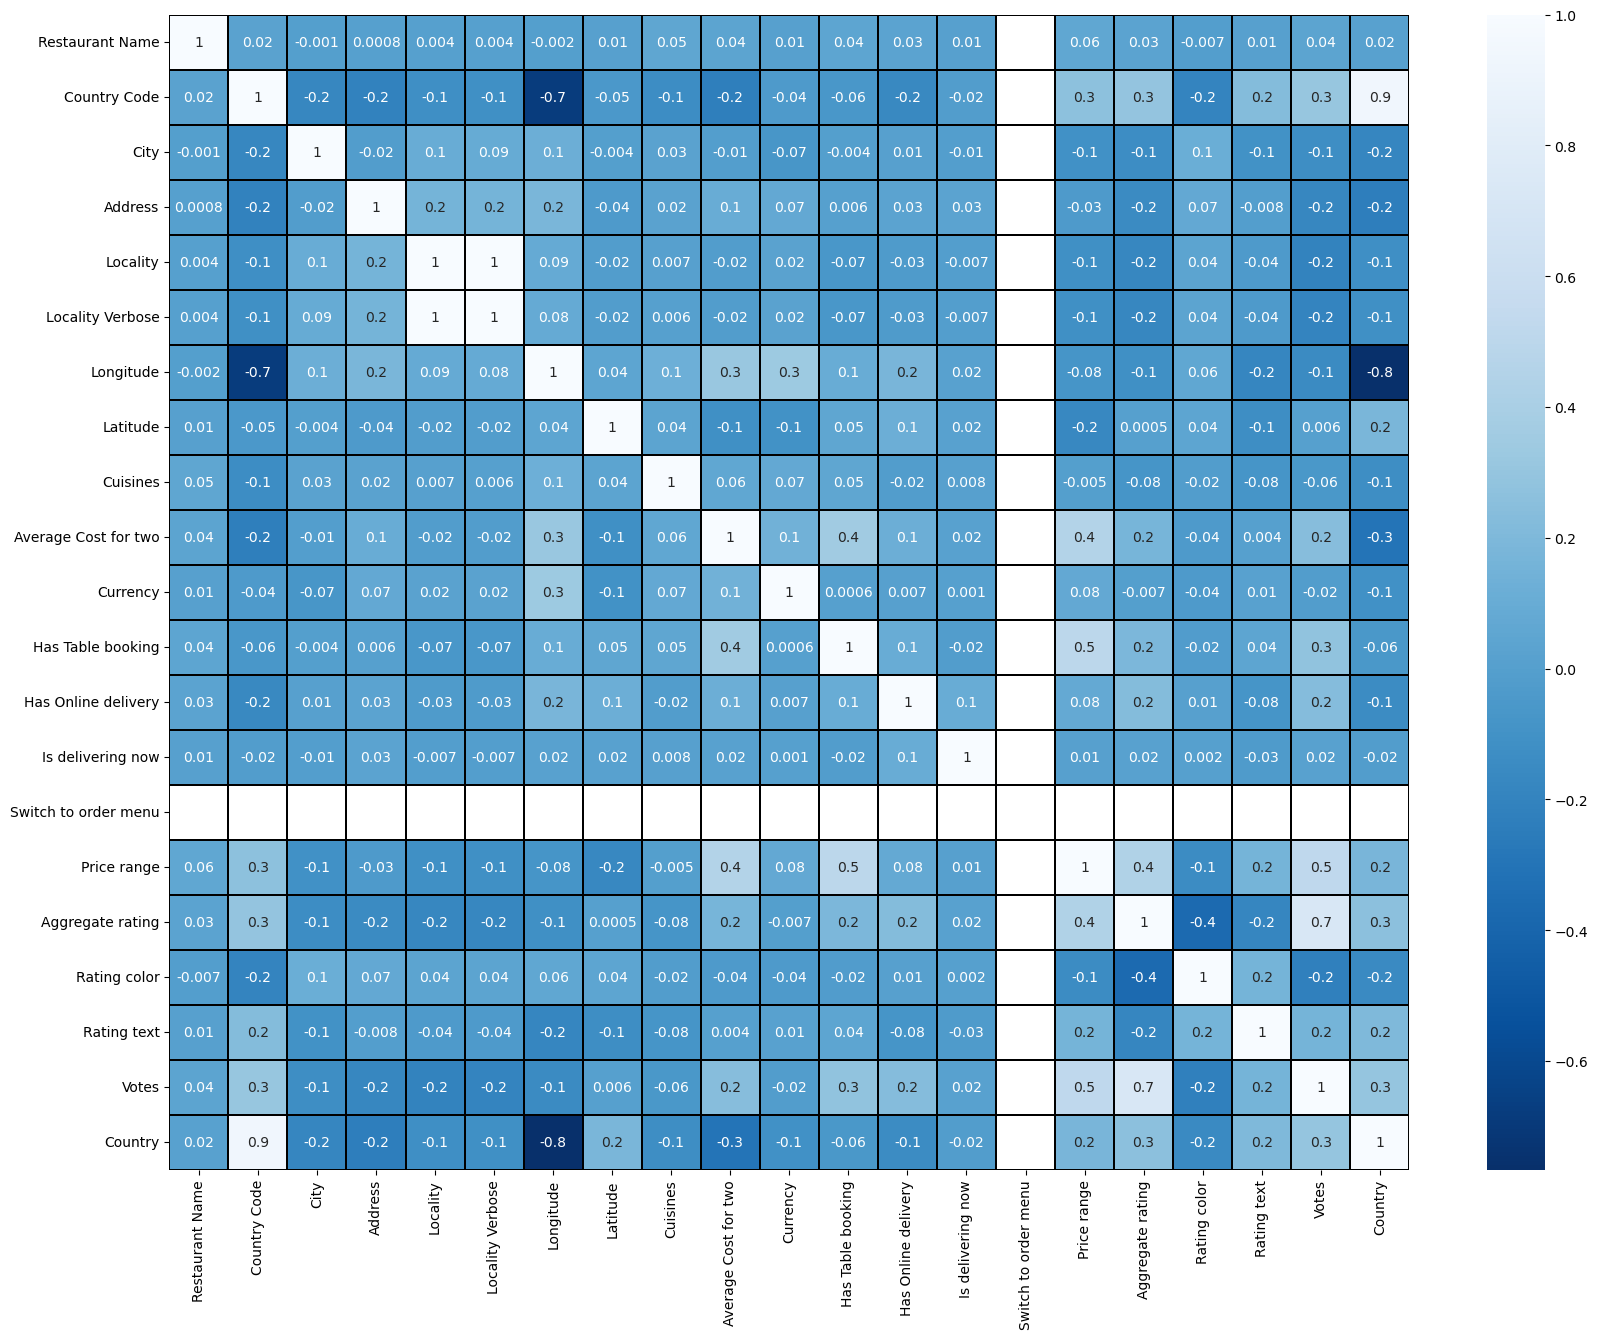

In [33]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [34]:
cor['Price range'].sort_values(ascending = False)

Price range             1.000000
Votes                   0.519227
Has Table booking       0.501925
Average Cost for two    0.449487
Aggregate rating        0.437944
Country Code            0.264689
Country                 0.178035
Rating text             0.164242
Has Online delivery     0.077918
Currency                0.075179
Restaurant Name         0.061275
Is delivering now       0.010940
Cuisines               -0.005350
Address                -0.034952
Longitude              -0.078939
City                   -0.105759
Locality Verbose       -0.112313
Locality               -0.114459
Rating color           -0.140468
Latitude               -0.166688
Switch to order menu         NaN
Name: Price range, dtype: float64

In [35]:
x = df.drop("Price range", axis=1)
y = df["Price range"]

In [36]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.044706,2.945144,-0.228533,1.614667,-1.542278,-1.523333,1.372269,-1.025581,-0.135100,0.719417,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.407131,-1.977859,-0.465442,1.143711,0.853457
1,-0.224101,2.945144,-0.228533,0.589558,-0.206201,-0.230035,1.371945,-1.026647,0.236387,0.804606,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.209281,-1.977859,-0.465442,1.719680,0.853457
2,-0.352904,2.945144,-0.142317,0.055177,-1.108528,-1.095249,1.372975,-1.024131,1.325565,2.276125,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.143331,-1.308053,1.895070,1.023257,0.853457
3,0.491783,2.945144,-0.142317,1.616615,0.645470,0.595987,1.372966,-1.023775,0.265562,1.034713,-4.351046,-0.371446,-0.587547,-0.059771,0.0,1.473081,-1.977859,-0.465442,1.269981,0.853457
4,0.872592,2.945144,-0.142317,1.616226,0.645470,0.595987,1.372991,-1.023854,0.257782,1.034713,-4.351046,2.692181,-0.587547,-0.059771,0.0,1.407131,-1.977859,-0.465442,0.898581,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.368580,3.292069,2.659685,0.539277,-0.446821,-0.465180,-0.847685,1.378025,1.601750,-0.967051,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.945480,-1.308053,1.895070,2.024656,2.738952
9547,-1.093055,3.292069,2.659685,0.553309,-0.336009,-0.359666,-0.846144,1.376849,1.623144,-0.852405,7.681415,-0.371446,-0.587547,-0.059771,0.0,1.011430,-1.308053,1.895070,2.340811,2.738952
9548,-0.272635,3.292069,2.659685,0.554868,-0.329677,-0.350622,-0.846305,1.381025,0.234442,-0.621905,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.681680,1.371170,0.124686,1.834884,2.738952
9549,-1.465464,3.292069,2.659685,0.555258,-0.329677,-0.350622,-0.846272,1.381221,1.298336,-0.792189,7.681415,-0.371446,-0.587547,-0.059771,0.0,0.879530,-1.308053,1.895070,2.177017,2.738952


In [37]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [38]:
vif

,VIF values,Features
0,1.007623,Restaurant Name
1,19.661753,Country Code
2,1.086116,City
3,1.113662,Address
4,955.289565,Locality
5,954.255443,Locality Verbose
6,4.362842,Longitude
7,2.683101,Latitude
8,1.044094,Cuisines
9,1.436041,Average Cost for two


In [39]:
#Dropping Locality column
x.drop("Locality", axis=1, inplace=True)

In [40]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [41]:
vif

,VIF values,Features
0,1.007612,Restaurant Name
1,19.649527,Country Code
2,1.077592,City
3,1.111984,Address
4,1.072094,Locality Verbose
5,4.362247,Longitude
6,2.683054,Latitude
7,1.043806,Cuisines
8,1.435870,Average Cost for two
9,1.309820,Currency


In [42]:
#Dropping Locality column
x.drop("Country Code", axis=1, inplace=True)

In [43]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [44]:
vif

,VIF values,Features
0,1.007449,Restaurant Name
1,1.076439,City
2,1.110105,Address
3,1.070423,Locality Verbose
4,3.446104,Longitude
5,1.304595,Latitude
6,1.043574,Cuisines
7,1.416105,Average Cost for two
8,1.300483,Currency
9,1.223333,Has Table booking


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 1.0 at random_state 4


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=maxRS)

In [47]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [48]:
#Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

1.0
[[13  0  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8
[[12  1  0  0]
 [ 1 10  0  0]
 [ 0  1  2  0]
 [ 0  0  3  0]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       0.83      0.91      0.87        11
           3       0.40      0.67      0.50         3
           4       0.00      0.00      0.00         3

    accuracy                           0.80        30
   macro avg       0.54      0.62      0.57        30
weighted avg       0.75      0.80      0.77        30



In [50]:
#Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9
[[12  1  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  2  1]]
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11
           3       0.60      1.00      0.75         3
           4       1.00      0.33      0.50         3

    accuracy                           0.90        30
   macro avg       0.88      0.81      0.79        30
weighted avg       0.93      0.90      0.89        30



In [51]:
#Check accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predGB))

0.9
[[12  1  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  2  1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
#Check accuracy for AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(x_train,y_train)
predada = Ada.predict(x_test)
print(accuracy_score(y_test, predada))
print(confusion_matrix(y_test, predada))
print(classification_report(y_test, predada))

0.9
[[13  0  0  0]
 [ 0 11  0  0]
 [ 0  2  1  0]
 [ 0  1  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.79      1.00      0.88        11
           3       1.00      0.33      0.50         3
           4       1.00      0.67      0.80         3

    accuracy                           0.90        30
   macro avg       0.95      0.75      0.79        30
weighted avg       0.92      0.90      0.89        30



In [53]:
#Check accuracy for ExtraTreesClassifier
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)
predetc = Etc.predict(x_test)
print(accuracy_score(y_test, predetc))
print(confusion_matrix(y_test, predetc))
print(classification_report(y_test, predetc))

0.9666666666666667
[[12  1  0  0]
 [ 0 11  0  0]
 [ 0  0  3  0]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.98      0.98      0.98        30
weighted avg       0.97      0.97      0.97        30



In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
#Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.54160126 0.96125654 0.99162304 0.9973822  0.8617801 ]
0.8707286281407448
Difference between Accuracy score and Cross Validation score is - 0.1292713718592552


In [57]:
#Checking cv score for Logistic Regression Classifier
score1 = cross_val_score(LR, x, y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predLR) - score1.mean())

[0.68864469 0.83874346 0.86492147 0.86858639 0.82146597]
0.81647239322632
Difference between Accuracy score and Cross Validation score is - -0.016472393226319992


In [58]:
#Checking cv score for Support Vector Machine
score2 = cross_val_score(svc, x, y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predsvc) - score2.mean())

[0.57299843 0.85759162 0.91204188 0.92460733 0.83874346]
0.8211965446670011
Difference between Accuracy score and Cross Validation score is - 0.07880345533299893


In [59]:
#Checking cv score for Gradient Boost Classifier
score3 = cross_val_score(GB, x, y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predGB) - score3.mean())

[0.37048666 0.96125654 0.99424084 0.99947644 0.83350785]
0.8317936663187224
Difference between Accuracy score and Cross Validation score is - 0.16820633368127758


In [60]:
#Checking cv score for Ada Boost Classifier
score4 = cross_val_score(Ada, x, y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predada) - score4.mean())

[0.68393511 0.82565445 0.84816754 0.93560209 0.77172775]
0.8130173889934549
Difference between Accuracy score and Cross Validation score is - 0.08698261100654514


In [61]:
#Checking cv score for Extra Trees Classifier
score5 = cross_val_score(Etc, x, y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predetc) - score5.mean())

[0.38147567 0.83403141 0.91989529 0.93350785 0.86439791]
0.7866616255845875
Difference between Accuracy score and Cross Validation score is - 0.18000504108207915


In [62]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

In [63]:
from sklearn.ensemble import RandomForestClassifier
GCV = GridSearchCV(RandomForestClassifier(), params
                   , cv=5)

In [64]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

In [66]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 15, n_estimators = 13, min_samples_leaf=5, 
                                     min_samples_split=11)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


In [67]:
#Saving the model using .pk1
import joblib
joblib.dump(Final_model, "ZomatoRestaurant_Classification.pk1")

['ZomatoRestaurant_Classification.pk1']

In [68]:
#Lets load the saved model and get the predictions
model = joblib.load('ZomatoRestaurant_Classification.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([4, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 4, 2,
       2, 2, 1, 4, 3, 2, 3, 1], dtype=int64)

In [69]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,4,4
1,2,2
2,1,1
3,1,1
4,3,3
5,2,2
6,1,1
7,1,1
8,2,2
9,2,2
